# Tutorial on the Calculation of Tight-Binding Parameters

This notebook provides a guide to the use of the Linear Combination of Atomic Orbitals (LCAO) method as implemented in the QuantumDNA package. The LCAO approach, as parameterized by Mantela et al., provides an efficient representation of the electronic properties of DNA molecules based on their atomic configurations.

The primary input to this method is the atomic geometry of the bases that make up the DNA molecule. These geometries can be obtained from various databases and modeling tools. In this notebook, we present three practical examples that demonstrate how to use QuantumDNA with geometries derived from different sources:

Examples in this notebook:

* **Example I: 1BNA Dodecamer**.
Demonstrates the integration of DNA atomic geometries from the Protein Data Bank (PDB), focusing on the well-known 1BNA dodecamer structure.

* **Example II: Biovia Discovery Studio Geometries**
Explores how geometries generated with Biovia Discovery Studio can be seamlessly integrated into the LCAO workflow.

* **Example III: PubChem Nucleobase Geometries**
Demonstrates the use of geometries obtained directly from PubChem, highlighting the flexibility of QuantumDNA in handling nucleobase-level data.

By the end of this notebook, you will have a clear understanding of how to import, process, and use atomic geometries for DNA molecules from different sources, unlocking the full potential of the QuantumDNA package for your research.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.png)](https://colab.research.google.com/github/dehe1011/QuantumDNA-notebooks/blob/main/tutorials/1_Tight_Binding_Parameters.ipynb)

In [1]:
%load_ext autoreload
%autoreload 2

# Save flag: Set to True to enable saving results (currently unused in this script)
save = False

# Verbose flag: Set to True to enable detailed logging
verbose = False

## Setup

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# Installation of QuantumDNA
# --------------------------

from importlib.util import find_spec

qDNA_installed = find_spec('qDNA') is not None

if not qDNA_installed:
    %pip install qDNA
    print("Successfully installed the 'qDNA' package.")
else:
    print("Package 'qDNA' is already installed.")

if verbose:
    %pip show qDNA  

# ------------------------
# Directory Setup
# ------------------------

import os
from qDNA import ROOT_DIR as ROOT_DIR_QDNA

# Use the current working directory as the root
ROOT_DIR = os.getcwd()

# Define directories to load data
DATA_DIR = os.path.join(ROOT_DIR, "data", "my_geometries")
os.makedirs(DATA_DIR, exist_ok=True)

# Define directory to save figures
SAVE_DIR = os.path.join(ROOT_DIR, "my_figures")
os.makedirs(SAVE_DIR, exist_ok=True)

# Define the directory to load figures
from qDNA import ROOT_DIR as ROOT_DIR_QDNA
FIG_DIR = os.path.join(ROOT_DIR_QDNA, "qDNA", "data", "figures_tutorials")

if verbose:
    print(f"Data directory: '{DATA_DIR}' is ready.")
    print(f"Save directory: '{SAVE_DIR}' is ready.")
    print(f"Figures directory: '{FIG_DIR}' is ready.")

Package 'qDNA' is already installed.


## Example I: 1BNA Dodecamer

The [*RCSB Protein Data Bank (PDB)*](https://www.rcsb.org/) is a globally recognized, open-access repository that archives three-dimensional structural data of biological macromolecules, including proteins and nucleic acids. This resource is indispensable across various scientific disciplines, such as molecular biology, computational biology, and structural bioinformatics, facilitating advancements in research and education.

In this tutorial, we will utilize the *1BNA structure*, which represents a B-form DNA dodecamer with the sequence `5'-D(*CP*GP*CP*GP*AP*AP*TP*TP*CP*GP*CP*G)-3'`. This synthetic DNA fragment has been extensively studied to understand DNA conformation, base pairing, and interactions with various molecules, including proteins and drugs. The high-resolution crystal structure of 1BNA, determined at 1.9 Å, reveals a right-handed double-stranded B helix, serving as a foundational model for DNA structural analysis.

By integrating the 1BNA structure from the RCSB PDB into our QuantumDNA package, we can effectively demonstrate the application of the Linear Combination of Atomic Orbitals (LCAO) method in analyzing DNA molecules. To prepare this structure for simulations and analysis, we will follow these steps:

**1. Download the PDB File**
   Visit the [1BNA entry on RCSB.org](https://www.rcsb.org/structure/1BNA) and download the file in `.pdb` format.  
   Save the downloaded file to your designated data directory (`data/my_geometries`).

**2. Prepare the Structure**
   Use *Biovia Visual Studio* (or any molecular modeling tool of your choice) to refine the structure: 
   Remove the sugar-phosphate backbone and water molecules, include hydrogen atoms and save the modified structure in `.pdb` format.

**3. Run the Code Below**
   Apply the following Python code to process the modified `.pdb` file.

In [5]:
from qDNA import convert_pdb_to_xyz, calc_tb_params, wrap_save_tb_params

filename = "1BNA"
tb_model_name = 'ELM'
notes = "Geometries from RCSB 1BNA"

# convert PDB file into several XYZ files
filepath_pdb = os.path.join(DATA_DIR, "RCSB", f"{filename}.pdb")
convert_pdb_to_xyz(filepath_pdb)

# calculate TB parameters
directories = [os.path.join(DATA_DIR, "RCSB", filename)]
HOMO_dict, LUMO_dict = calc_tb_params(directories, tb_model_name)

# save TB parameters in a JSON file
wrap_save_tb_params(HOMO_dict, filename, "hole", tb_model_name, unit="meV", notes=notes)
wrap_save_tb_params(LUMO_dict, filename, "electron", tb_model_name, unit="meV", notes=notes)

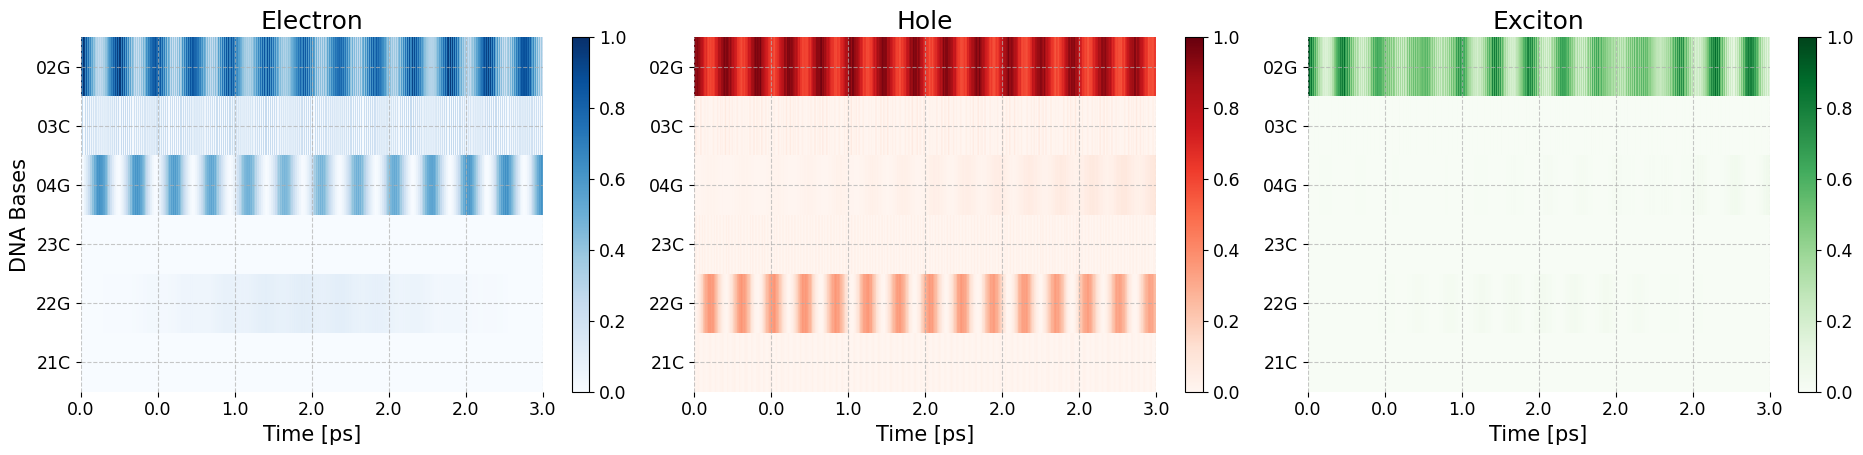

In [17]:
from qDNA import get_me_solver, plot_pops_heatmap

upper_strand = ['02G', '03C', '04G']
lower_strand = ['23C', '22G', '21C']

me_solver = get_me_solver(upper_strand, tb_model_name, source=filename, lower_strand=lower_strand, relaxation=False)
fig, ax = plot_pops_heatmap(me_solver)

if save:
    fig_filename = input("Filename for Saving: ")
    plt.savefig(os.path.join(SAVE_DIR, fig_filename + '.pdf'))

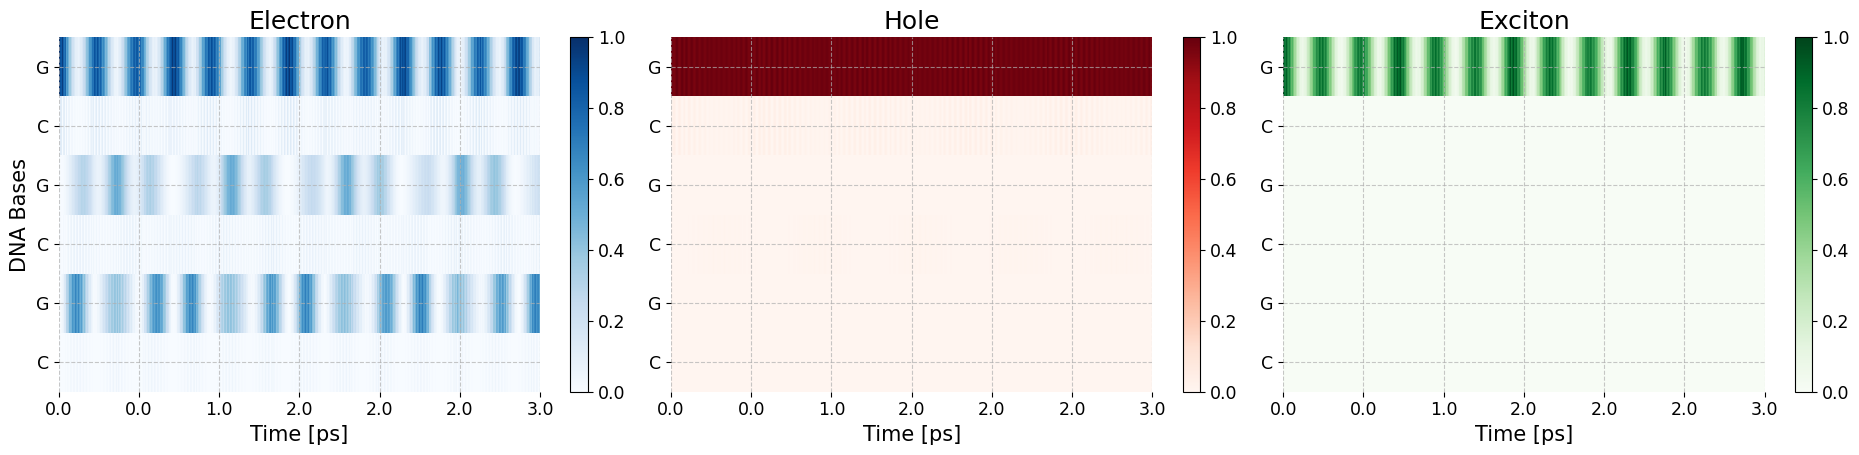

In [9]:
# compare the dynamics to the 
upper_strand = 'GCG'
lower_strand = 'CGC'

me_solver = get_me_solver(upper_strand, tb_model_name, source='Hawke2010', lower_strand=lower_strand, relaxation=False)
fig, ax = plot_pops_heatmap(me_solver)

if save:
    fig_filename = input("Filename for Saving: ")
    plt.savefig(os.path.join(SAVE_DIR, fig_filename + '.pdf'))

## Example II: Geometries from Biovia Discovery Studio

Using *Biovia Discovery Studio* or similar molecular editing software, you can generate PDB files of DNA and RNA sequences with optimized geometries. These tools offer flexibility to model nucleic acid structures with a high degree of customization. For example, you can:

* introduce single-base mismatches, 
* apply epigenetic modifications such as methylation
* perform translations or rotations of individual bases relative to one another (see the illustration below)

These modifications allow for in-depth investigations into how structural variations impact the electronic properties of nucleic acids.

One of the most common base mismatches observed in DNA is the *G·T mismatch*, which occurs when guanine pairs with thymine instead of its usual partner, cytosine. As an example, we will examine the G·T mismatch resulting from such a mutation, along with *cytosine methylation* in the sequence `ATGAC`. This configuration allows us to investigate how a single mismatch, combined with an epigenetic modification, can influence the electronic properties and structural integrity of DNA.

When preparing geometries for use with the QuantumDNA package, it is important to ensure that the sugar-phosphate backbone and any water molecules are removed in Biovia Discovery Studio or your chosen software. This preprocessing step is essential for focusing solely on the atomic configurations of the bases and their interactions.

Image taken from: M. Mantela, C. Simserides and R. Di Felice, LCAO electronic structure of nucleic acid bases and other heterocycles and transfer integrals in B-DNA, including structural variability. *Materials 14*, 4930 (2021).


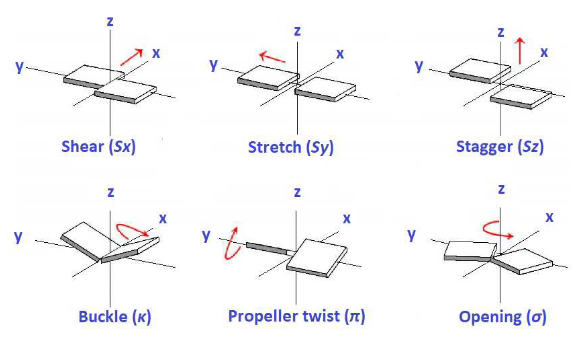

In [6]:
from IPython.display import Image

citation = "M. Mantela, C. Simserides and R. Di Felice, LCAO electronic structure of nucleic acid bases and other heterocycles and transfer integrals in B-DNA, including structural variability. *Materials 14*, 4930 (2021)"
print(f"Image taken from: {citation}.")
Image(filename=os.path.join(FIG_DIR,'base_translation_rotation.png'), width=600)

In [7]:
from qDNA import convert_pdb_to_xyz, calc_tb_params, wrap_save_tb_params

filename = "wildtype_ATGAC"
tb_model_name = 'ELM'
notes = "Geometries from Biovia"

# convert PDB file into several XYZ files
filepath_pdb = os.path.join(DATA_DIR, "Biovia", f"{filename}.pdb")
convert_pdb_to_xyz(filepath_pdb)

# calculate TB parameters
directories = [os.path.join(DATA_DIR, "Biovia", filename)]
HOMO_dict, LUMO_dict = calc_tb_params(directories, tb_model_name)

# save TB parameters in a JSON file
wrap_save_tb_params(HOMO_dict, filename, "hole", tb_model_name, unit="meV", notes=notes)
wrap_save_tb_params(LUMO_dict, filename, "electron", tb_model_name, unit="meV", notes=notes)

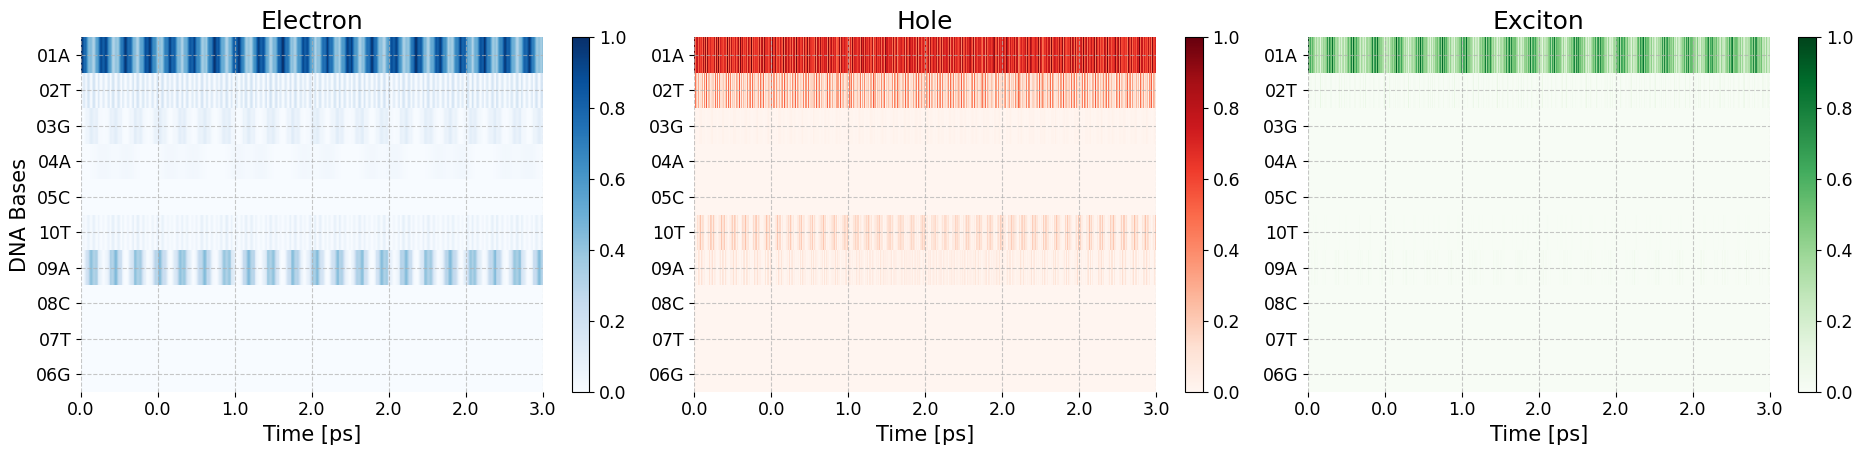

In [9]:
from qDNA import get_me_solver, plot_pops_heatmap

upper_strand = ['01A', '02T', '03G', '04A', '05C']
lower_strand = ['10T', '09A', '08C', '07T', '06G']

me_solver = get_me_solver(upper_strand, tb_model_name, source=filename, lower_strand=lower_strand, relaxation=False)
fig, ax = plot_pops_heatmap(me_solver)

if save:
    fig_filename = input("Filename for Saving: ")
    plt.savefig(os.path.join(SAVE_DIR, fig_filename + '.pdf'))

In [10]:
from qDNA import convert_pdb_to_xyz, calc_tb_params, wrap_save_tb_params

filename = "modified_ATGAC"
tb_model_name = 'ELM'
notes = "Geometries from Biovia"

# convert PDB file into several XYZ files
filepath_pdb = os.path.join(DATA_DIR, "Biovia", f"{filename}.pdb")
convert_pdb_to_xyz(filepath_pdb)

# calculate TB parameters
directories = [os.path.join(DATA_DIR, "Biovia", filename)]
HOMO_dict, LUMO_dict = calc_tb_params(directories, tb_model_name)

# save TB parameters in a JSON file
wrap_save_tb_params(HOMO_dict, filename, "hole", tb_model_name, unit="meV", notes=notes)
wrap_save_tb_params(LUMO_dict, filename, "electron", tb_model_name, unit="meV", notes=notes)

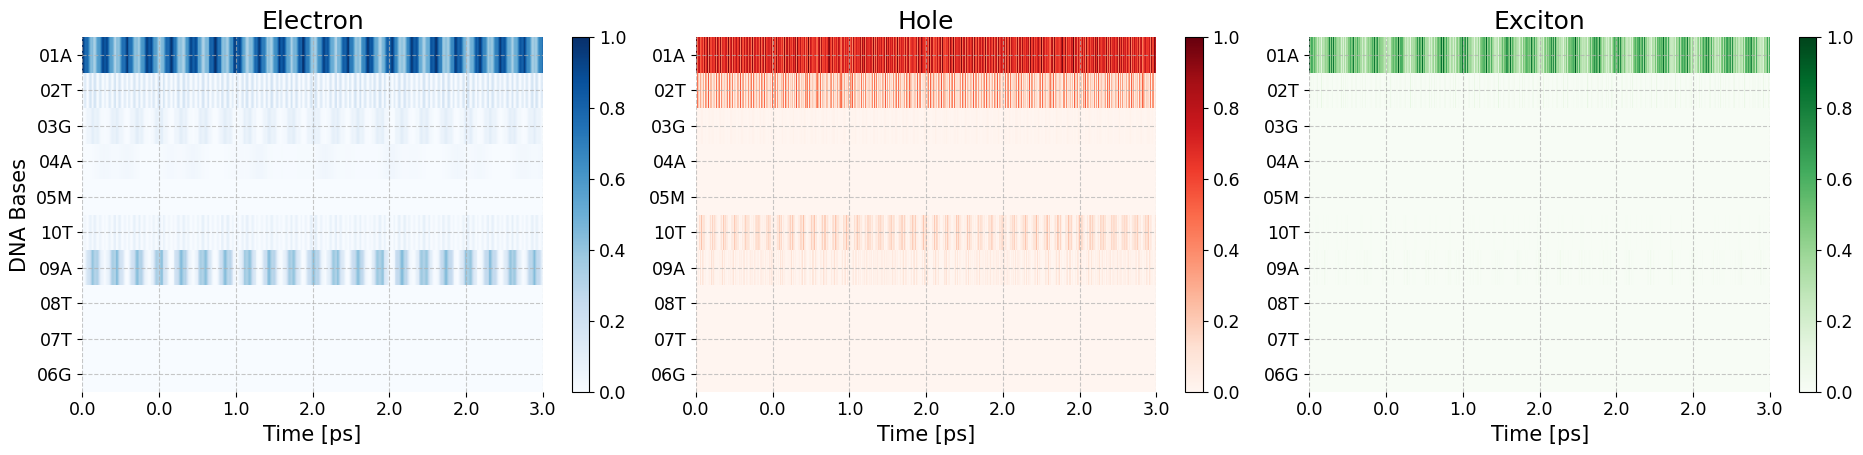

In [11]:
from qDNA import get_me_solver, plot_pops_heatmap

upper_strand = ['01A', '02T', '03G', '04A', '05M']
lower_strand = ['10T', '09A', '08T', '07T', '06G']

me_solver = get_me_solver(upper_strand, tb_model_name, source=filename, lower_strand=lower_strand, relaxation=False)
fig, ax = plot_pops_heatmap(me_solver)

if save:
    fig_filename = input("Filename for Saving: ")
    plt.savefig(os.path.join(SAVE_DIR, fig_filename + '.pdf'))

## Example III: Pubchem Nucleobase Geometries

To perform simulations at the nucleobase level with high accuracy, you can utilize geometries sourced from [*PubChem*](https://pubchem.ncbi.nlm.nih.gov/), a comprehensive database for small molecules and biological macromolecules. By downloading the molecular structure in the `JSON` file format from PubChem, you gain access to well-optimized geometries suitable for quantum mechanical simulations.

In this example, we demonstrate how to leverage these geometries to calculate several important quantum properties, including:

* **HOMO and LUMO Energies**
The highest occupied molecular orbital (HOMO) and the lowest unoccupied molecular orbital (LUMO) energies are critical for understanding the electronic structure of a molecule. These values are directly related to the molecule's chemical reactivity, stability, and ability to participate in charge transfer processes.

* **Higher and Lower Molecular Orbitals**
Beyond the HOMO and LUMO, analyzing higher and lower molecular orbitals provides a more complete picture of the molecule's electronic structure and the distribution of electronic density.

* **Dipole Moment**
The dipole moment quantifies the separation of positive and negative charges within the molecule, reflecting its polarity. This property is crucial for understanding intermolecular interactions, such as hydrogen bonding and van der Waals forces.

* **Oscillator Strength**
The oscillator strength measures the intensity of electronic transitions between energy levels, which is essential for predicting absorption spectra and understanding light-matter interactions.

Furthermore, we illustrate the occupation probabilities of the atomic orbitals for both the HOMO and LUMO. We find that pz orbitals dominate the electronic structure of both the HOMO and LUMO. This observation aligns with the expected electronic properties of nucleobases, where pi-bonding and delocalized electron systems primarily arise from pz orbital overlap.

In [16]:
from qDNA import convert_json_to_xyz, load_xyz, Base

filenames = ['A', 'T', 'G', 'C']

bases_dict={}
for filename in filenames:
    # convert_json_to_xyz(filename, os.path.join(DATA_DIR, "PubChem"))
    xyz_identifier, xyz_data = load_xyz(filename, os.path.join(DATA_DIR, "PubChem"))
    base = Base(xyz_identifier, xyz_data)
    bases_dict[filename] = base

In [19]:
print("MO Energies")
print("-------------------------------")

for filename, base in bases_dict.items(): 
    print(f"Base {filename}")
    print(f"E_HOMO: {base.E_HOMO}")
    print(f"E_LUMO: {base.E_LUMO}")
    print("-----------------------")

MO Energies
-------------------------------
Base A
E_HOMO: -8.4407322055674
E_LUMO: -4.353816583266132
-----------------------
Base T
E_HOMO: -9.090176569811192
E_LUMO: -4.269864330116976
-----------------------
Base G
E_HOMO: -8.281394650281886
E_LUMO: -4.163643216571927
-----------------------
Base C
E_HOMO: -8.563575099685968
E_LUMO: -4.324600853805935
-----------------------


In [20]:
print("Dipole Moments")
print("-------------------------------")

for filename, base in bases_dict.items(): 
    print(f"Base {filename}")
    print(f"E_HOMO: {base.dipole_moment}")
    print(f"E_LUMO: {base.dipole_moment}")
    print("-----------------------")

Dipole Moments
-------------------------------
Base A
E_HOMO: 1.5860489654879984e-19
E_LUMO: 1.5860489654879984e-19
-----------------------
Base T
E_HOMO: 1.3919405167518742e-19
E_LUMO: 1.3919405167518742e-19
-----------------------
Base G
E_HOMO: 1.3584496131063896e-19
E_LUMO: 1.3584496131063896e-19
-----------------------
Base C
E_HOMO: 1.4163068684545128e-19
E_LUMO: 1.4163068684545128e-19
-----------------------


In [21]:
print("Oscillator Strengths")
print("-------------------------------")

for filename, base in bases_dict.items(): 
    print(f"Base {filename}")
    print(f"E_HOMO: {base.oscillator_strength}")
    print(f"E_LUMO: {base.oscillator_strength}")
    print("-----------------------")

Oscillator Strengths
-------------------------------
Base A
E_HOMO: 0.35039981977453133
E_LUMO: 0.35039981977453133
-----------------------
Base T
E_HOMO: 0.31831092499978986
E_LUMO: 0.31831092499978986
-----------------------
Base G
E_HOMO: 0.2589895354410743
E_LUMO: 0.2589895354410743
-----------------------
Base C
E_HOMO: 0.28980810108720023
E_LUMO: 0.28980810108720023
-----------------------


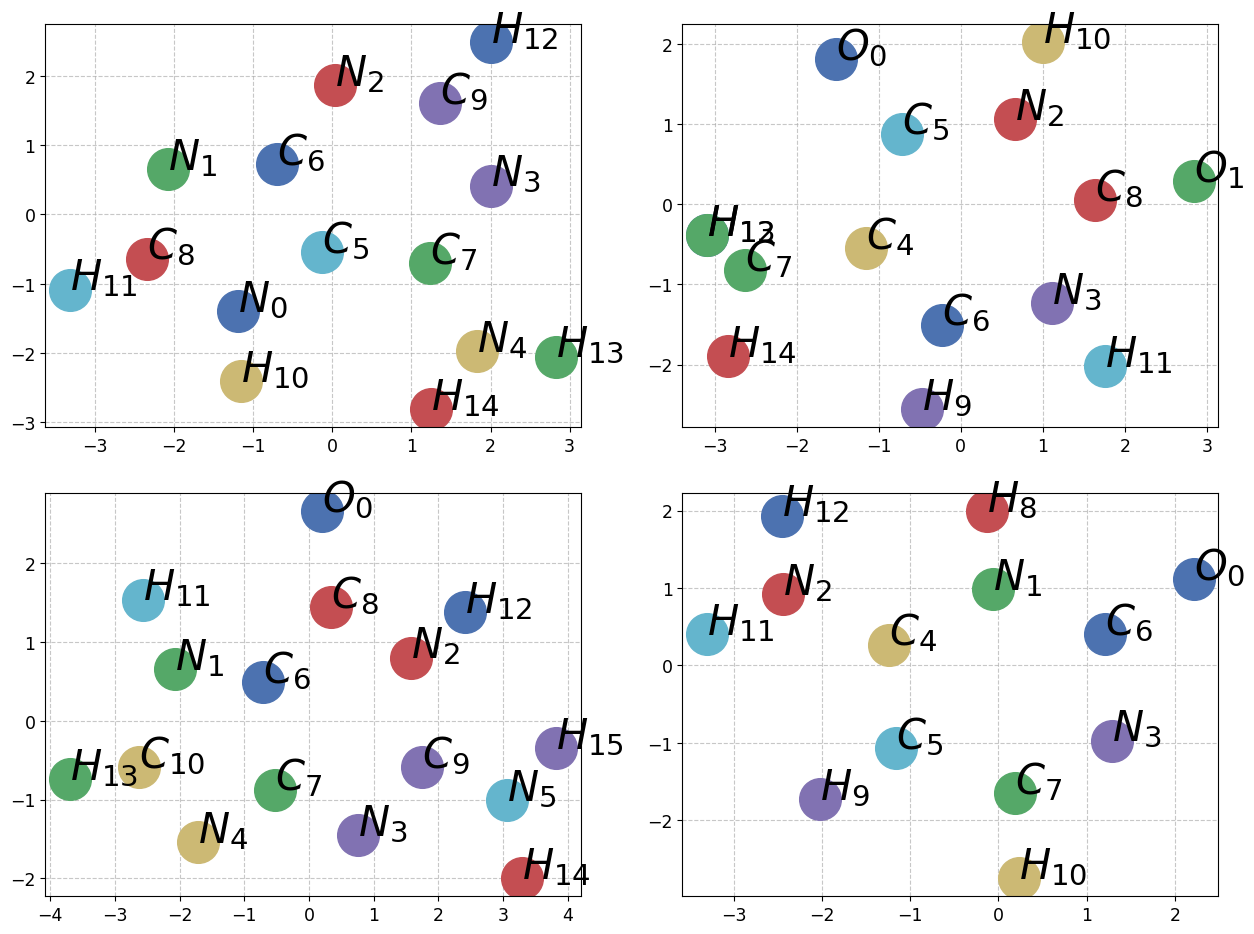

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(6.4*2, 4.8*2))
axes = ax.flatten()

for i, (filename, base) in enumerate(bases_dict.items()):
    
    atom_identifiers = []
    for atom_identifier in base.atom_identifiers:
        atom, number = atom_identifier.split('_')
        atom_identifiers.append( f'${atom}_{{{number}}}$' )
    
    for j, atom_identifier in enumerate(atom_identifiers):
        axes[i].plot( base.atom_coordinates[j, 0], base.atom_coordinates[j, 1], '.', markersize=60)
        axes[i].text( base.atom_coordinates[j, 0], base.atom_coordinates[j, 1], f'{atom_identifier}', fontsize =30)

if save:
    fig_filename = input("Filename for Saving: ")
    plt.savefig(os.path.join(SAVE_DIR, fig_filename + '.pdf'))

HOMO type: pi
LUMO type: pi


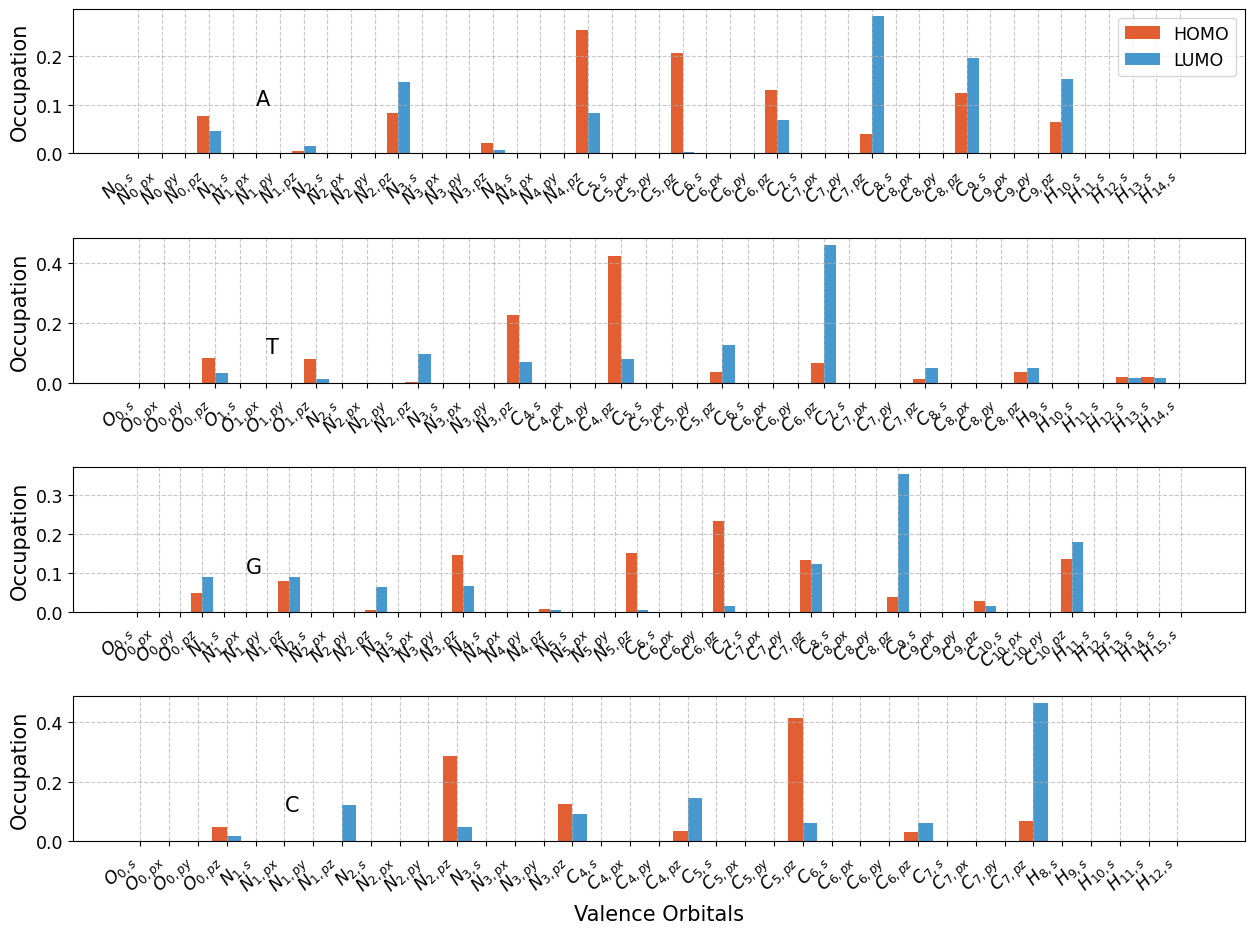

In [24]:
from qDNA import load_xyz, Base

bar_width = 0.5
fig, ax = plt.subplots(4, 1, figsize=(6.4*2, 4.8*2))

for i, (filename, base) in enumerate(bases_dict.items()):

    x = np.arange(base.num_orbitals)
    ax[i].bar(x - bar_width/2, base.HOMO_occupation, width=bar_width, label='HOMO', color='#e25f33')
    ax[i].bar(x + bar_width/2, base.LUMO_occupation, width=bar_width, label='LUMO', color='#4798ce')

    orbital_identifiers = []
    for orbital_identifier in base.orbital_identifiers:
        atom, number, orbital = orbital_identifier.split('_')
        orbital_identifiers.append( f'${atom}_{{ {number}, {orbital} }}$' )
    
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(orbital_identifiers, rotation=45, ha='right', fontsize='small')
    
    ax[i].text(5, 0.1, filename, fontsize=15)
    ax[i].set_ylabel("Occupation")

ax[3].set_xlabel("Valence Orbitals")
ax[0].legend()


print(f"HOMO type: {base.HOMO_type}")
print(f"LUMO type: {base.LUMO_type}")

if save:
    fig_filename = input("Filename for Saving: ")
    plt.savefig(os.path.join(SAVE_DIR, fig_filename + '.pdf'))